# Supervised

In [1]:
import speech as projutil
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import classify

### read data

In [15]:
print("Reading data")
tarfname = "data/speech.tar.gz"
speech = projutil.read_files(tarfname)
print("Training classifier")

Reading data
-- train data
train.tsv
4370
-- dev data
dev.tsv
414
-- transforming data and labels
Training classifier


In [3]:
print(speech.trainX.toarray())
print(speech.trainy)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[10 11  9 ...  3 14  3]


In [16]:
print("Reading unlabeled data")
unlabeled = projutil.read_unlabeled(tarfname, speech)

Reading unlabeled data
(43342, 7916)


## Compare different penalty

In [4]:
penal = ['l1', 'l2']
for p in penal:
    model = LogisticRegression(solver='liblinear', penalty=p)
    model.fit(speech.trainX, speech.trainy)
    print(f'Evaluating on {p} penalty.')
    classify.evaluate(speech.trainX, speech.trainy, model)
    classify.evaluate(speech.devX, speech.devy, model)

Evaluating on l1 penalty.
  Accuracy 0.8054919908466819
  Accuracy 0.391304347826087
Evaluating on l2 penalty.
  Accuracy 0.9832951945080092
  Accuracy 0.4082125603864734


## Compare different regularization strength

In [5]:
C = np.linspace(0.1, 1.0, 10)
train_acc = np.zeros(10)
valid_acc = np.zeros(10)
for i, c in enumerate(C):
    model = LogisticRegression(solver='liblinear', C=c)
    model.fit(speech.trainX, speech.trainy)
    print(f'Evaluating on {c} strength.')
    train_acc[i] = classify.evaluate(speech.trainX, speech.trainy, model)
    valid_acc[i] = classify.evaluate(speech.devX, speech.devy, model)

Evaluating on 0.1 strength.
  Accuracy 0.6169336384439359
  Accuracy 0.39371980676328505
Evaluating on 0.2 strength.
  Accuracy 0.7661327231121281
  Accuracy 0.41304347826086957
Evaluating on 0.30000000000000004 strength.
  Accuracy 0.8510297482837529
  Accuracy 0.41304347826086957
Evaluating on 0.4 strength.
  Accuracy 0.9041189931350114
  Accuracy 0.4106280193236715
Evaluating on 0.5 strength.
  Accuracy 0.9366132723112128
  Accuracy 0.41545893719806765
Evaluating on 0.6 strength.
  Accuracy 0.9578947368421052
  Accuracy 0.41545893719806765
Evaluating on 0.7000000000000001 strength.
  Accuracy 0.9679633867276888
  Accuracy 0.41304347826086957
Evaluating on 0.8 strength.
  Accuracy 0.9745995423340961
  Accuracy 0.41304347826086957
Evaluating on 0.9 strength.
  Accuracy 0.9787185354691076
  Accuracy 0.4106280193236715
Evaluating on 1.0 strength.
  Accuracy 0.9832951945080092
  Accuracy 0.4082125603864734


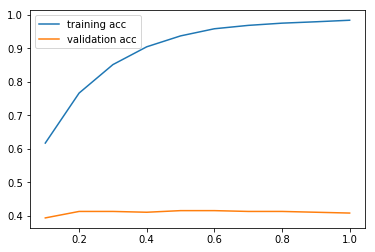

In [7]:
plt.plot(C, train_acc, label='training acc')
plt.plot(C, valid_acc, label='validation acc')
plt.legend()
plt.savefig('image/sup_l2_C_010')
plt.show()

### More to see on interval [0.4, 0.8]. How better we can improve.

In [11]:
smallC = np.linspace(0.4, 0.8, 100)
small_train_acc = np.zeros(100)
small_valid_acc = np.zeros(100)
for i, c in enumerate(smallC):
    model = LogisticRegression(solver='liblinear', C=c)
    model.fit(speech.trainX, speech.trainy)
    small_train_acc[i] = metrics.accuracy_score(speech.trainy, model.predict(speech.trainX))
    small_valid_acc[i] = metrics.accuracy_score(speech.devy, model.predict(speech.devX))

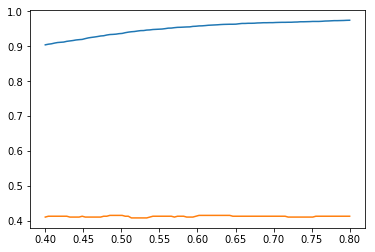

In [12]:
plt.plot(smallC, small_train_acc)
plt.plot(smallC, small_valid_acc)
plt.show()

In [14]:
best_c = smallC[np.argmax(small_valid_acc)]

### try to write the unlabel file

In [17]:
best_c_model = LogisticRegression(solver='liblinear', C=best_c)
best_c_model.fit(speech.trainX, speech.trainy)

print("Writing pred file")
projutil.write_pred_kaggle_file(unlabeled, best_c_model, "data/speech-pred.csv", speech)

Reading unlabeled data
(43342, 7916)
Writing pred file


## try l1 penalty with different regulization strength

In [8]:
C = np.linspace(0.1, 1.0, 10)
train_acc = np.zeros(10)
valid_acc = np.zeros(10)
for i, c in enumerate(C):
    model = LogisticRegression(solver='liblinear', penalty='l1', C=c)
    model.fit(speech.trainX, speech.trainy)
    print(f'Evaluating on {c} strength.')
    train_acc[i] = classify.evaluate(speech.trainX, speech.trainy, model)
    valid_acc[i] = classify.evaluate(speech.devX, speech.devy, model)

Evaluating on 0.1 strength.
  Accuracy 0.3560640732265446
  Accuracy 0.28502415458937197
Evaluating on 0.2 strength.
  Accuracy 0.4105263157894737
  Accuracy 0.3140096618357488
Evaluating on 0.30000000000000004 strength.
  Accuracy 0.47437070938215103
  Accuracy 0.3526570048309179
Evaluating on 0.4 strength.
  Accuracy 0.5306636155606407
  Accuracy 0.3695652173913043
Evaluating on 0.5 strength.
  Accuracy 0.5844393592677346
  Accuracy 0.39371980676328505
Evaluating on 0.6 strength.
  Accuracy 0.6347826086956522
  Accuracy 0.3961352657004831
Evaluating on 0.7000000000000001 strength.
  Accuracy 0.6922196796338673
  Accuracy 0.40096618357487923
Evaluating on 0.8 strength.
  Accuracy 0.7338672768878719
  Accuracy 0.4057971014492754
Evaluating on 0.9 strength.
  Accuracy 0.7718535469107551
  Accuracy 0.4033816425120773
Evaluating on 1.0 strength.
  Accuracy 0.8052631578947368
  Accuracy 0.391304347826087


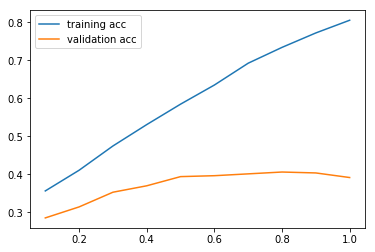

In [9]:
plt.plot(C, train_acc, label='training acc')
plt.plot(C, valid_acc, label='validation acc')
plt.legend()
plt.savefig('image/sup_l1_C_010.png')
plt.show()

In [19]:
smallC = np.linspace(0.7, 0.8, 100)
small_train_acc = np.zeros(100)
small_valid_acc = np.zeros(100)
for i, c in enumerate(smallC):
    model = LogisticRegression(solver='liblinear', penalty='l1', C=c)
    model.fit(speech.trainX, speech.trainy)
    small_train_acc[i] = metrics.accuracy_score(speech.trainy, model.predict(speech.trainX))
    small_valid_acc[i] = metrics.accuracy_score(speech.devy, model.predict(speech.devX))

In [20]:
best_c = smallC[np.argmax(small_valid_acc)]
best_c_model = LogisticRegression(solver='liblinear', penalty='l1', C=best_c)
best_c_model.fit(speech.trainX, speech.trainy)

print("Writing pred file")
projutil.write_pred_kaggle_file(unlabeled, best_c_model, "data/speech-pred.csv", speech)

Reading unlabeled data
(43342, 7916)
Writing pred file


In [31]:
C = np.linspace(0.1, 1.0, 10)
train_acc = np.zeros(10)
valid_acc = np.zeros(10)
for i, c in enumerate(C):
    model = LogisticRegression(max_iter=500, C=c)
    model.fit(speech.trainX, speech.trainy)
    print(f'Evaluating on {c} strength.')
    train_acc[i] = classify.evaluate(speech.trainX, speech.trainy, model)
    valid_acc[i] = classify.evaluate(speech.devX, speech.devy, model)

Evaluating on 0.1 strength.
  Accuracy 0.6540045766590389
  Accuracy 0.39855072463768115
Evaluating on 0.2 strength.
  Accuracy 0.8137299771167048
  Accuracy 0.41304347826086957
Evaluating on 0.30000000000000004 strength.
  Accuracy 0.8993135011441648
  Accuracy 0.4033816425120773
Evaluating on 0.4 strength.
  Accuracy 0.9491990846681923
  Accuracy 0.40096618357487923
Evaluating on 0.5 strength.
  Accuracy 0.9695652173913043
  Accuracy 0.40096618357487923
Evaluating on 0.6 strength.
  Accuracy 0.9791762013729977
  Accuracy 0.4082125603864734
Evaluating on 0.7000000000000001 strength.
  Accuracy 0.9837528604118994
  Accuracy 0.4178743961352657
Evaluating on 0.8 strength.
  Accuracy 0.9881006864988559
  Accuracy 0.41545893719806765
Evaluating on 0.9 strength.
  Accuracy 0.9903890160183066
  Accuracy 0.41545893719806765
Evaluating on 1.0 strength.
  Accuracy 0.9926773455377574
  Accuracy 0.41545893719806765


In [32]:
smallC = np.linspace(0.6, 0.9, 100)
small_train_acc = np.zeros(100)
small_valid_acc = np.zeros(100)
for i, c in enumerate(smallC):
    model = LogisticRegression(max_iter=500, C=c)
    model.fit(speech.trainX, speech.trainy)
    small_train_acc[i] = metrics.accuracy_score(speech.trainy, model.predict(speech.trainX))
    small_valid_acc[i] = metrics.accuracy_score(speech.devy, model.predict(speech.devX))

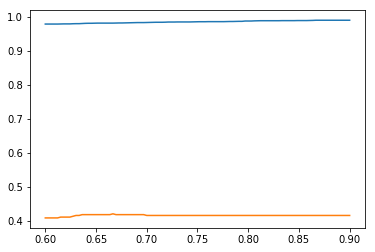

In [33]:
plt.plot(smallC, small_train_acc)
plt.plot(smallC, small_valid_acc)
plt.show()

## TF-IDF Weighting

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [41]:
speech.tfidf_vect = TfidfVectorizer(min_df=5, stop_words='english')
speech.tfidf_trainX = speech.tfidf_vect.fit_transform(speech.train_data)
speech.tfidf_devX = speech.tfidf_vect.transform(speech.dev_data)

In [42]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [61]:
df = np.linspace(1, 100, 100, dtype=int)
train_acc = np.zeros(100)
valid_acc = np.zeros(100)
for i, c in enumerate(df):
    speech.tfidf_vect = TfidfVectorizer(min_df=c, ngram_range=(1,3) ,stop_words='english')
    speech.tfidf_trainX = speech.tfidf_vect.fit_transform(speech.train_data)
    speech.tfidf_devX = speech.tfidf_vect.transform(speech.dev_data)
    model = LogisticRegression(solver='liblinear', C=0.45)
    model.fit(speech.tfidf_trainX, speech.trainy)
    print(f'Evaluating on {c} min_df.')
    train_acc[i] = classify.evaluate(speech.tfidf_trainX, speech.trainy, model)
    valid_acc[i] = classify.evaluate(speech.tfidf_devX, speech.devy, model)

Evaluating on 1 min_df.
  Accuracy 0.3489702517162471
  Accuracy 0.26811594202898553
Evaluating on 2 min_df.
  Accuracy 0.4025171624713959
  Accuracy 0.30676328502415456
Evaluating on 3 min_df.
  Accuracy 0.408466819221968
  Accuracy 0.3164251207729469
Evaluating on 4 min_df.
  Accuracy 0.4139588100686499
  Accuracy 0.32367149758454106
Evaluating on 5 min_df.
  Accuracy 0.41716247139588103
  Accuracy 0.32608695652173914
Evaluating on 6 min_df.
  Accuracy 0.4183066361556064
  Accuracy 0.33816425120772947
Evaluating on 7 min_df.
  Accuracy 0.41807780320366134
  Accuracy 0.34057971014492755
Evaluating on 8 min_df.
  Accuracy 0.41624713958810067
  Accuracy 0.33816425120772947
Evaluating on 9 min_df.
  Accuracy 0.41716247139588103
  Accuracy 0.34541062801932365
Evaluating on 10 min_df.
  Accuracy 0.41647597254004576
  Accuracy 0.34782608695652173
Evaluating on 11 min_df.
  Accuracy 0.41670480549199085
  Accuracy 0.34782608695652173
Evaluating on 12 min_df.
  Accuracy 0.41601830663615563
  A

Evaluating on 97 min_df.
  Accuracy 0.31922196796338675
  Accuracy 0.28019323671497587
Evaluating on 98 min_df.
  Accuracy 0.3183066361556064
  Accuracy 0.28019323671497587
Evaluating on 99 min_df.
  Accuracy 0.31670480549199087
  Accuracy 0.27294685990338163
Evaluating on 100 min_df.
  Accuracy 0.31670480549199087
  Accuracy 0.27294685990338163


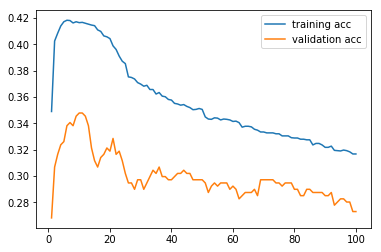

In [62]:
plt.plot(df, train_acc, label='training acc')
plt.plot(df, valid_acc, label='validation acc')
plt.legend()
# plt.savefig('image/sup_tfidf_difmindf')
plt.show()

In [76]:
tfidf_model = LogisticRegression(solver='liblinear')
tfidf_model.fit(speech.trainX, speech.trainy)
unlabeled.X = speech.tfidf_vect.transform(unlabeled.data)
yp = tfidf_model.predict(unlabeled.X)
labels = speech.le.inverse_transform(yp)
f = open("data/speech-pred.csv", 'w')
f.write("FileIndex,Category\n")
for i in range(len(unlabeled.fnames)):
    fname = unlabeled.fnames[i]
    # iid = file_to_id(fname)
    f.write(str(i+1))
    f.write(",")
    # f.write(fname)
    # f.write(",")
    f.write(labels[i])
    f.write("\n")
f.close()

In [63]:
df[np.argmax(valid_acc)]

10

In [53]:
speech.tfidf_vect = TfidfVectorizer(min_df=12, stop_words='english')
speech.tfidf_trainX = speech.tfidf_vect.fit_transform(speech.train_data)
speech.tfidf_devX = speech.tfidf_vect.transform(speech.dev_data)

In [54]:
C = np.linspace(0.1, 10.0, 100)
train_acc = np.zeros(100)
valid_acc = np.zeros(100)
for i, c in enumerate(C):
    model = LogisticRegression(solver='liblinear', C=c)
    model.fit(speech.tfidf_trainX, speech.trainy)
    print(f'Evaluating on {c} strength.')
    train_acc[i] = classify.evaluate(speech.tfidf_trainX, speech.trainy, model)
    valid_acc[i] = classify.evaluate(speech.tfidf_devX, speech.devy, model)

Evaluating on 0.1 strength.
  Accuracy 0.3146453089244851
  Accuracy 0.2632850241545894
Evaluating on 0.2 strength.
  Accuracy 0.3494279176201373
  Accuracy 0.2826086956521739
Evaluating on 0.30000000000000004 strength.
  Accuracy 0.37734553775743707
  Accuracy 0.3115942028985507
Evaluating on 0.4 strength.
  Accuracy 0.40411899313501143
  Accuracy 0.34057971014492755
Evaluating on 0.5 strength.
  Accuracy 0.4196796338672769
  Accuracy 0.3502415458937198
Evaluating on 0.6 strength.
  Accuracy 0.43455377574370707
  Accuracy 0.3502415458937198
Evaluating on 0.7000000000000001 strength.
  Accuracy 0.4482837528604119
  Accuracy 0.34782608695652173
Evaluating on 0.8 strength.
  Accuracy 0.46018306636155604
  Accuracy 0.34782608695652173
Evaluating on 0.9 strength.
  Accuracy 0.46979405034324945
  Accuracy 0.357487922705314
Evaluating on 1.0 strength.
  Accuracy 0.4812356979405034
  Accuracy 0.36231884057971014
Evaluating on 1.1 strength.
  Accuracy 0.49084668192219677
  Accuracy 0.362318840

  Accuracy 0.6910755148741419
  Accuracy 0.3502415458937198
Evaluating on 9.1 strength.
  Accuracy 0.691533180778032
  Accuracy 0.3502415458937198
Evaluating on 9.2 strength.
  Accuracy 0.6924485125858123
  Accuracy 0.3526570048309179
Evaluating on 9.3 strength.
  Accuracy 0.6935926773455378
  Accuracy 0.3526570048309179
Evaluating on 9.4 strength.
  Accuracy 0.6940503432494279
  Accuracy 0.3526570048309179
Evaluating on 9.5 strength.
  Accuracy 0.6954233409610984
  Accuracy 0.35507246376811596
Evaluating on 9.6 strength.
  Accuracy 0.6961098398169336
  Accuracy 0.35507246376811596
Evaluating on 9.700000000000001 strength.
  Accuracy 0.6965675057208238
  Accuracy 0.35507246376811596
Evaluating on 9.8 strength.
  Accuracy 0.6974828375286041
  Accuracy 0.35507246376811596
Evaluating on 9.9 strength.
  Accuracy 0.6979405034324943
  Accuracy 0.35507246376811596
Evaluating on 10.0 strength.
  Accuracy 0.6993135011441648
  Accuracy 0.35507246376811596


In [56]:
C[np.argmax(valid_acc)]

1.0

## feature exaction

In [33]:
speech.count_vect2 = CountVectorizer(min_df=10, stop_words='english')
speech.trainX2 = speech.count_vect2.fit_transform(speech.train_data)
speech.devX2 = speech.count_vect2.transform(speech.dev_data)

In [34]:
len(speech.count_vect2.get_feature_names())

917

In [57]:
df = np.linspace(1, 100, 100, dtype=int)
train_acc = np.zeros(100)
valid_acc = np.zeros(100)
for i, c in enumerate(df):
    speech.count_vect2 = CountVectorizer(min_df=c, stop_words='english')
    speech.trainX2 = speech.count_vect2.fit_transform(speech.train_data)
    speech.devX2 = speech.count_vect2.transform(speech.dev_data)
    model = LogisticRegression(solver='liblinear', C=0.45)
    model.fit(speech.trainX2, speech.trainy)
    print(f'Evaluating on {c} min_df.')
    train_acc[i] = classify.evaluate(speech.trainX2, speech.trainy, model)
    valid_acc[i] = classify.evaluate(speech.devX2, speech.devy, model)

Evaluating on 1 min_df.
  Accuracy 0.8718535469107551
  Accuracy 0.4057971014492754
Evaluating on 2 min_df.
  Accuracy 0.820137299771167
  Accuracy 0.40096618357487923
Evaluating on 3 min_df.
  Accuracy 0.782608695652174
  Accuracy 0.40096618357487923
Evaluating on 4 min_df.
  Accuracy 0.7466819221967963
  Accuracy 0.391304347826087
Evaluating on 5 min_df.
  Accuracy 0.7151029748283753
  Accuracy 0.391304347826087
Evaluating on 6 min_df.
  Accuracy 0.6929061784897025
  Accuracy 0.3864734299516908
Evaluating on 7 min_df.
  Accuracy 0.6718535469107552
  Accuracy 0.3743961352657005
Evaluating on 8 min_df.
  Accuracy 0.6537757437070938
  Accuracy 0.3719806763285024
Evaluating on 9 min_df.
  Accuracy 0.631121281464531
  Accuracy 0.38405797101449274
Evaluating on 10 min_df.
  Accuracy 0.6080091533180778
  Accuracy 0.37681159420289856
Evaluating on 11 min_df.
  Accuracy 0.5862700228832952
  Accuracy 0.36231884057971014
Evaluating on 12 min_df.
  Accuracy 0.5798627002288329
  Accuracy 0.355072

  Accuracy 0.32311212814645307
  Accuracy 0.27053140096618356
Evaluating on 98 min_df.
  Accuracy 0.3219679633867277
  Accuracy 0.26811594202898553
Evaluating on 99 min_df.
  Accuracy 0.32128146453089246
  Accuracy 0.26811594202898553
Evaluating on 100 min_df.
  Accuracy 0.32128146453089246
  Accuracy 0.26811594202898553


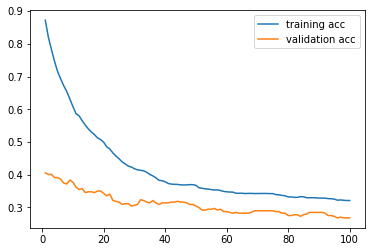

In [58]:
plt.plot(df, train_acc, label='training acc')
plt.plot(df, valid_acc, label='validation acc')
plt.legend()
plt.savefig('image/sup_count_difmindf')
plt.show()

In [64]:
from sklearn.decomposition import TruncatedSVD

In [106]:
svd = TruncatedSVD(n_components=50)
trainx = svd.fit_transform(speech.trainX)
devx = svd.transform(speech.devX)

In [124]:
components = np.arange(1, 200)
train_acc = np.zeros(len(components))
valid_acc = np.zeros(len(components))

for i, c in enumerate(components):
    svd = TruncatedSVD(n_components=c)
    trainx = svd.fit_transform(speech.trainX)
    devx = svd.transform(speech.devX)
    model = LogisticRegression(random_state=0,solver='liblinear', C=0.45)
    model.fit(np.concatenate((speech.trainX.toarray(), trainx), axis=1), speech.trainy)
    valid_acc[i] = classify.evaluate(np.concatenate([speech.devX.toarray(), devx], axis=1), speech.devy, model)
    train_acc[i] = classify.evaluate(np.concatenate((speech.trainX.toarray(), trainx), axis=1), speech.trainy, model)

  Accuracy 0.41304347826086957
  Accuracy 0.9208237986270023
  Accuracy 0.41304347826086957
  Accuracy 0.9201372997711671
  Accuracy 0.41304347826086957
  Accuracy 0.9201372997711671
  Accuracy 0.41304347826086957
  Accuracy 0.9205949656750572
  Accuracy 0.41304347826086957
  Accuracy 0.9203661327231121
  Accuracy 0.41304347826086957
  Accuracy 0.9205949656750572
  Accuracy 0.41304347826086957
  Accuracy 0.9203661327231121
  Accuracy 0.41304347826086957
  Accuracy 0.9203661327231121
  Accuracy 0.41304347826086957
  Accuracy 0.9201372997711671
  Accuracy 0.4106280193236715
  Accuracy 0.9201372997711671
  Accuracy 0.41304347826086957
  Accuracy 0.9201372997711671
  Accuracy 0.41304347826086957
  Accuracy 0.9201372997711671
  Accuracy 0.41304347826086957
  Accuracy 0.9203661327231121
  Accuracy 0.41545893719806765
  Accuracy 0.9201372997711671
  Accuracy 0.41545893719806765
  Accuracy 0.9203661327231121
  Accuracy 0.41304347826086957
  Accuracy 0.9203661327231121
  Accuracy 0.415458937198

  Accuracy 0.9217391304347826
  Accuracy 0.4106280193236715
  Accuracy 0.9196796338672769
  Accuracy 0.4057971014492754
  Accuracy 0.9215102974828375
  Accuracy 0.4082125603864734
  Accuracy 0.9212814645308924
  Accuracy 0.4082125603864734
  Accuracy 0.9203661327231121
  Accuracy 0.4082125603864734
  Accuracy 0.9212814645308924
  Accuracy 0.41304347826086957
  Accuracy 0.9205949656750572
  Accuracy 0.4106280193236715
  Accuracy 0.9203661327231121
  Accuracy 0.4106280193236715
  Accuracy 0.9208237986270023
  Accuracy 0.4082125603864734
  Accuracy 0.9208237986270023
  Accuracy 0.41304347826086957
  Accuracy 0.9205949656750572
  Accuracy 0.41304347826086957
  Accuracy 0.9212814645308924
  Accuracy 0.41304347826086957
  Accuracy 0.9210526315789473
  Accuracy 0.4106280193236715
  Accuracy 0.9205949656750572
  Accuracy 0.4082125603864734
  Accuracy 0.9221967963386728
  Accuracy 0.4082125603864734
  Accuracy 0.9219679633867277
  Accuracy 0.4082125603864734
  Accuracy 0.9219679633867277
  Accu

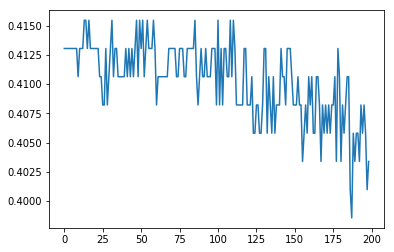

In [125]:
plt.plot(valid_acc)

In [129]:
np.argmax(valid_acc)

13

In [133]:
svd = TruncatedSVD(n_components=50)
trainx = svd.fit_transform(speech.trainX)
devx = svd.transform(speech.devX)
model = LogisticRegression(solver='liblinear', C=0.45)
model.fit(np.concatenate((speech.trainX.toarray(), trainx), axis=1), speech.trainy)
valid_acc[i] = classify.evaluate(np.concatenate([speech.devX.toarray(), devx], axis=1), speech.devy, model)
train_acc[i] = classify.evaluate(np.concatenate((speech.trainX.toarray(), trainx), axis=1), speech.trainy, model)

  Accuracy 0.4178743961352657
  Accuracy 0.9205949656750572


In [139]:
print("Writing pred file")
yp = model.predict(np.concatenate([unlabeled.X.toarray(), svd.transform(unlabeled.X)], axis=1))
labels = speech.le.inverse_transform(yp)
f = open("data/speech-pred.csv", 'w')
f.write("FileIndex,Category\n")
for i in range(len(unlabeled.fnames)):
    fname = unlabeled.fnames[i]
    # iid = file_to_id(fname)
    f.write(str(i+1))
    f.write(",")
    # f.write(fname)
    # f.write(",")
    f.write(labels[i])
    f.write("\n")
f.close()

Writing pred file
